<a href="https://colab.research.google.com/github/jmcnerney1/Jack-Mcnerney-Python/blob/main/McNerney%20-%20FinalExam_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import all the necessary packages.  **[2 points]**

In [ ]:
import pandas as pd
import io
from google.colab import files


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Rename the dependent variable:

In [ ]:
#renaming the dependent variable
df['IsDefaulter'] =df['default.payment.next.month']
df = df.drop('default.payment.next.month',axis = 1)

#renaming a few other independent variables
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.rename(columns={'default.payment.next.month': 'Target'}, inplace=True)

# **EXPLORATORY DATA ANALYSIS**  **[05 points]**

2. What is the size of the dataset? What do the columns tell you? That is, what are the features?

3. Print the summary statistics. On Brightspace, describe your findings (in around 4-5 lines). What trends do you notice? Any anomaly? Does anything stick out as being strange?

In [ ]:
print(df.shape)
print(df.columns)
print(df.describe())

(30000, 25)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000

## 4. How would you deal with **missing values**? HINT: look at the education variable and what each category means in the definitions list that I have provided you with.

##### Explain what you do with missing values. Do you drop them, or ignore them, or impute them with the average, or put them into fewer buckets? Explain your reasoning. **Check** if **other variables** require the same treatment or not.  **[5 points]**

In [ ]:
print(df.isnull().sum())

ID               0
LIMIT_BAL        0
SEX              0
EDUCATION        0
MARRIAGE         0
AGE              0
PAY_SEPT         0
PAY_AUG          0
PAY_JUL          0
PAY_JUN          0
PAY_MAY          0
PAY_APR          0
BILL_AMT_SEPT    0
BILL_AMT_AUG     0
BILL_AMT_JUL     0
BILL_AMT_JUN     0
BILL_AMT_MAY     0
BILL_AMT_APR     0
PAY_AMT_SEPT     0
PAY_AMT_AUG      0
PAY_AMT_JUL      0
PAY_AMT_JUN      0
PAY_AMT_MAY      0
PAY_AMT_APR      0
IsDefaulter      0
dtype: int64


### Similarly, check for **outliers** and deal with them accordingly.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

print(outliers.sum())

ID                  0
LIMIT_BAL         167
SEX                 0
EDUCATION         454
MARRIAGE            0
AGE               272
PAY_SEPT         3130
PAY_AUG          4410
PAY_JUL          4209
PAY_JUN          3508
PAY_MAY          2968
PAY_APR          3079
BILL_AMT_SEPT    2400
BILL_AMT_AUG     2395
BILL_AMT_JUL     2469
BILL_AMT_JUN     2622
BILL_AMT_MAY     2725
BILL_AMT_APR     2693
PAY_AMT_SEPT     2745
PAY_AMT_AUG      2714
PAY_AMT_JUL      2598
PAY_AMT_JUN      2994
PAY_AMT_MAY      2945
PAY_AMT_APR      2958
IsDefaulter      6636
dtype: int64


### 5. What is the **probability of default**?  **[3 points]**

In [ ]:
default_rate = df['IsDefaulter'].mean()
print(f"Probability of default: {default_rate:.2%}")

Probability of default: 22.12%


### 6. Create a few charts like count of default, and sex, education, marriage, and age versus default. These can be bar charts, pie charts, whatever you like. You can select other variables as per your liking too.  **[10 points]**

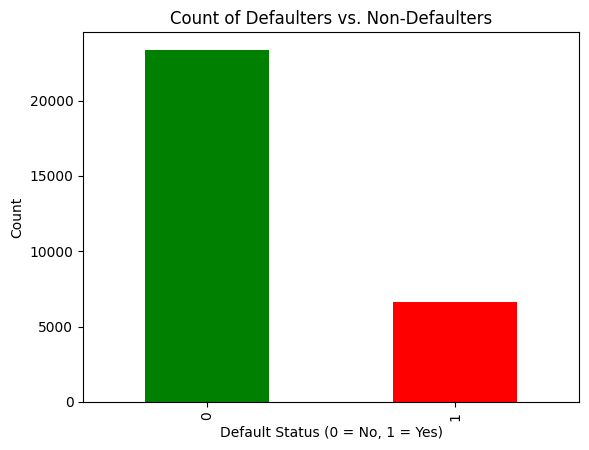

In [ ]:
import matplotlib.pyplot as plt

# Count of defaulters vs. non-defaulters
df['IsDefaulter'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Count of Defaulters vs. Non-Defaulters')
plt.show()

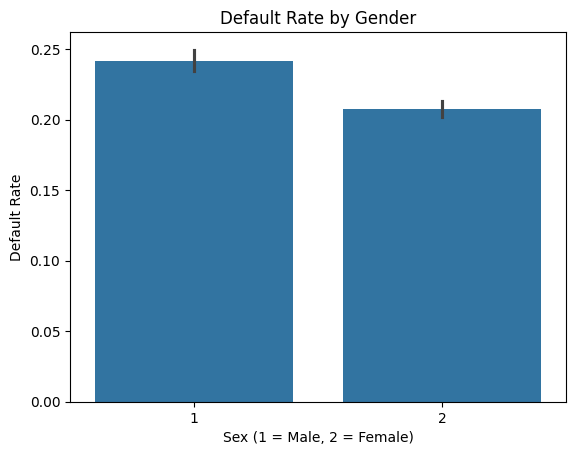

In [ ]:
import seaborn as sns
sns.barplot(x='SEX', y='IsDefaulter', data=df)
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Default Rate')
plt.title('Default Rate by Gender')
plt.show()

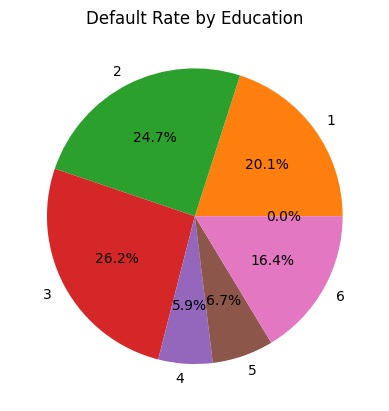

In [ ]:
df.groupby('EDUCATION')['IsDefaulter'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Default Rate by Education')
plt.ylabel('')
plt.show()

## I am first goint to balance the imbalanced dataset. Next, I have created a column which is the sum of all payments made by each consumer.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

columns = list(df.columns)
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df['IsDefaulter'] = y_smote
df_fr = balance_df.copy()
df_fr['Payment_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

Original dataset shape 30000
Resampled dataset shape 46728


### 7. What is the payment value and dues value of a defaulter versus a non-defaulter, on average? Show me a boxplot and indicate if there is a difference.  **[4 points]**

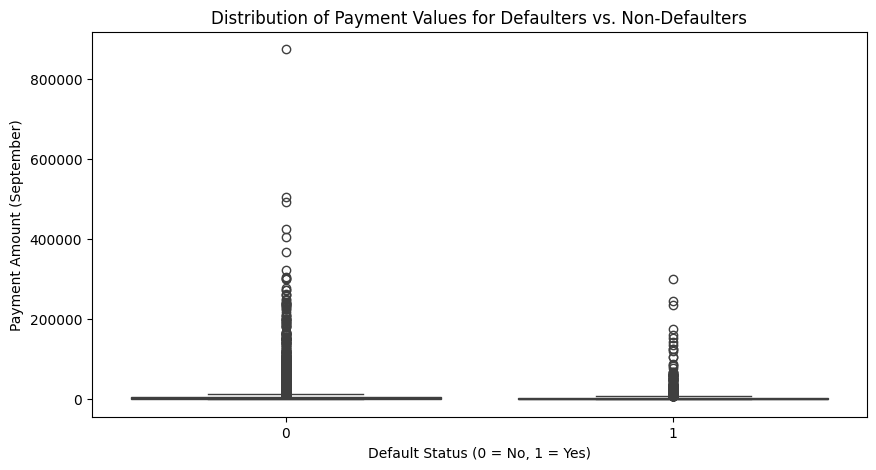

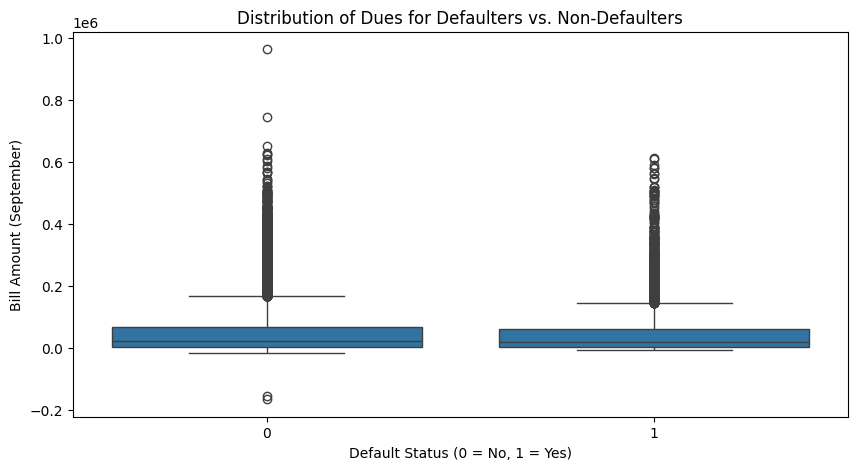

In [ ]:
df.groupby('IsDefaulter')[['PAY_AMT_SEPT', 'BILL_AMT_SEPT']].mean()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Boxplot for payment values
sns.boxplot(x='IsDefaulter', y='PAY_AMT_SEPT', data=df)
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Payment Amount (September)')
plt.title('Distribution of Payment Values for Defaulters vs. Non-Defaulters')
plt.show()

# Boxplot for dues values
plt.figure(figsize=(10, 5))
sns.boxplot(x='IsDefaulter', y='BILL_AMT_SEPT', data=df)
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Bill Amount (September)')
plt.title('Distribution of Dues for Defaulters vs. Non-Defaulters')
plt.show()

### 8. Convert your sex, education, and marriage columns to string variables, and then **'one-hot-encode'** them.  **[6 points]**

#### The process for 'sex' shown to you as an example:

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)
df_fr.head()

<ipython-input-24-6f1881a36b8e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fr = df_fr.replace(encoders_nums)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payment_Value,Dues
0,1,20000.0,0,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,3913.0
1,2,120000.0,0,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,10352.0
2,3,90000.0,0,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,76608.0
3,4,50000.0,0,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,174713.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,44620.0


In [ ]:
df.replace({'EDUCATION': {1: 'Graduate', 2: 'University', 3: 'HighSchool', 4: 'Other'}}, inplace=True)
df.replace({'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Other'}}, inplace=True)


In [ ]:
import pandas as pd

df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

KeyError: "None of [Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')] are in the [columns]"

9. Now, ML. [5 points]

First, standardize your data, shuffle it, and divide it into the train-test-split samples. Choose a split of your choice.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
X = df_fr.drop(columns=['IsDefaulter'])  # Features
y = df_fr['IsDefaulter']  # Target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Set Shape: {X_test.shape}, {y_test.shape}")

Training Set Shape: (37382, 36), (37382,)
Testing Set Shape: (9346, 36), (9346,)


### 9a. Logistic Regression. **[10 points]**
  - run logistic regression.
  - calculate accuracy.
  - print the confusion matrix.
  - plot feature importance.
  - get the classification report.
  - plot the ROC-AUC curve.

Model Accuracy: 71.82%


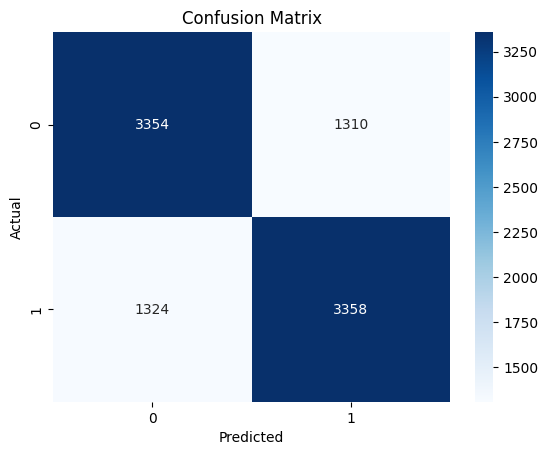

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      4664
           1       0.72      0.72      0.72      4682

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



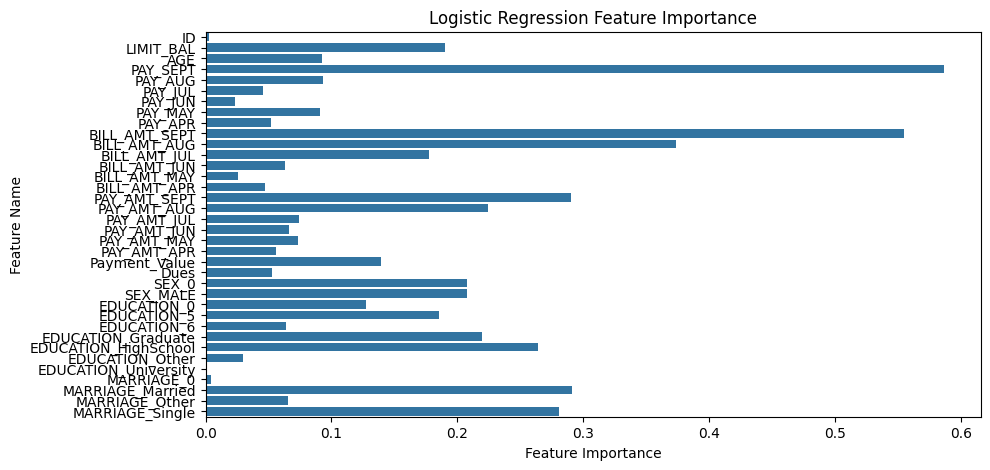

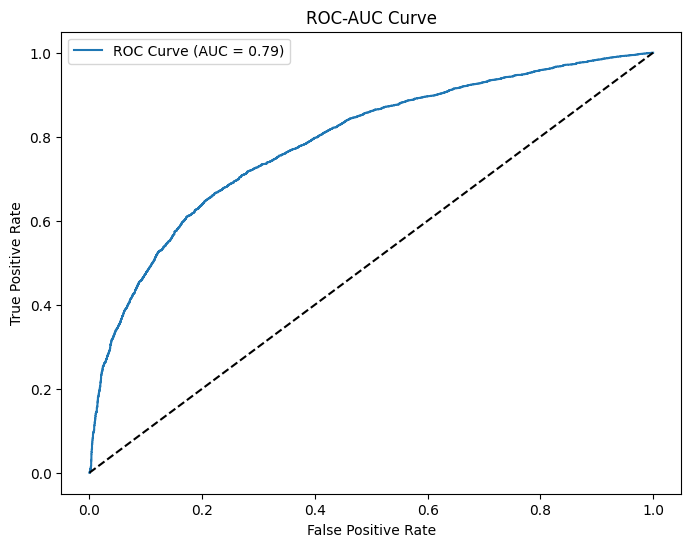

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred))

importance = np.abs(log_reg.coef_).flatten()
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Logistic Regression Feature Importance")
plt.show()

y_probs = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

## Repeat the above steps with all the supervised ML techniques that you are familiar with:

#### 9b. Decision Tree                        **[10 points]**
#### 9c. Random Forest                        **[10 points]**
#### 9d. K-Nearest Neighbors                  **[10 points]**
#### 9e. Support Vector Machine (NEW method)  **[10 points]**

Model Accuracy: 75.10%


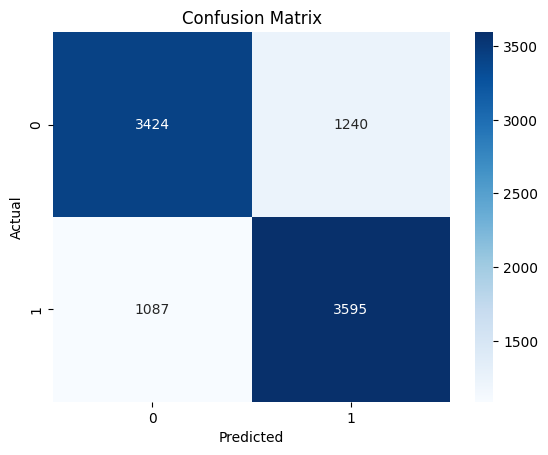

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      4664
           1       0.74      0.77      0.76      4682

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



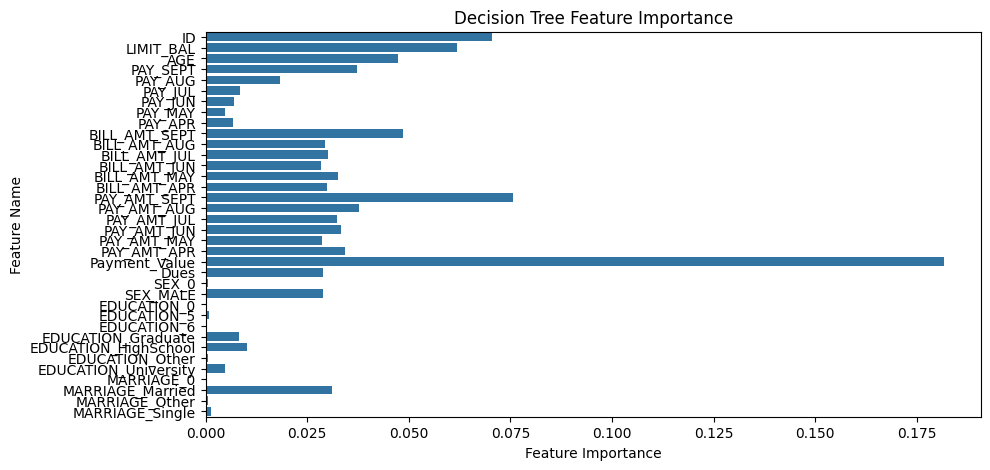

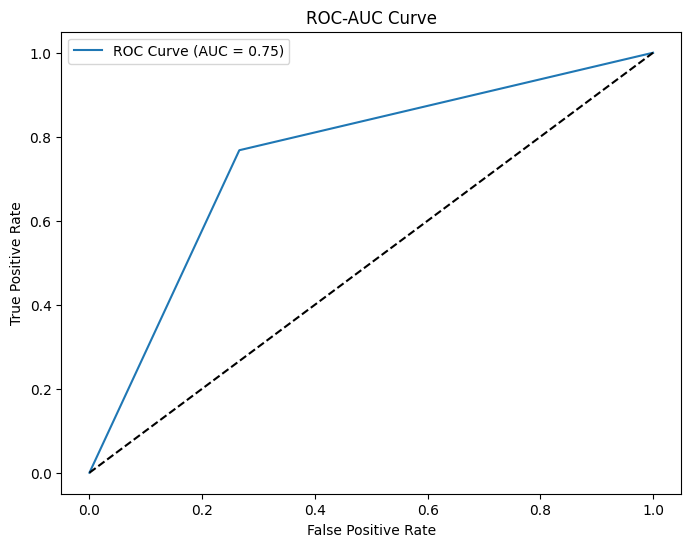

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

importance = tree.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Decision Tree Feature Importance")
plt.show()

y_probs = tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

Model Accuracy: 83.29%


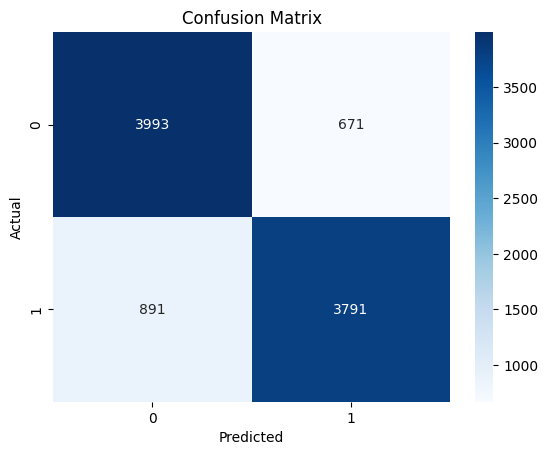

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4664
           1       0.85      0.81      0.83      4682

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346



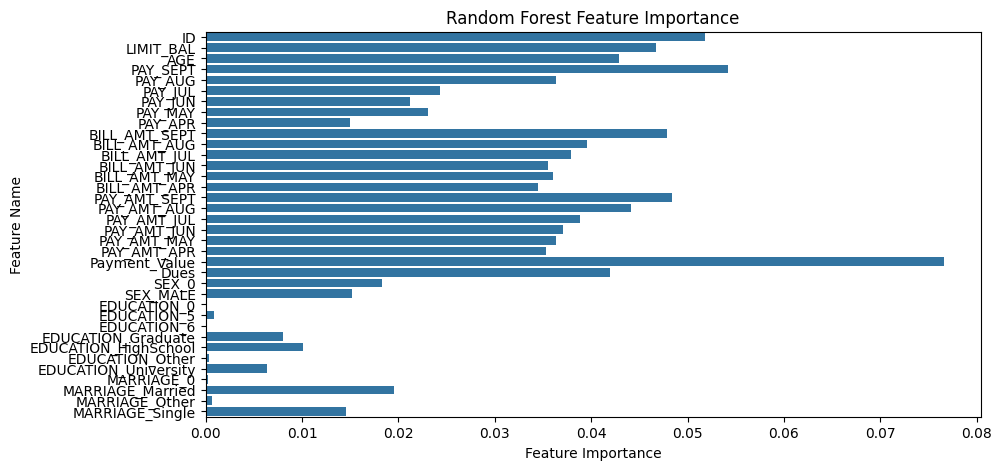

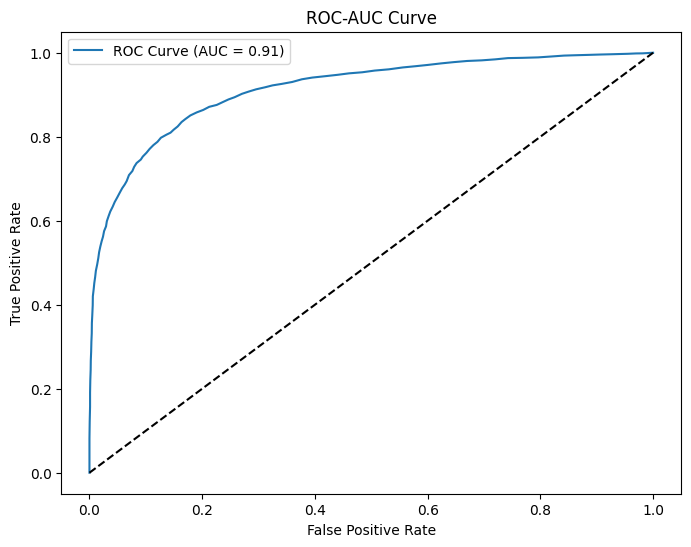

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
sns.barplot(x=importance, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")
plt.show()

y_probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

Model Accuracy: 75.40%


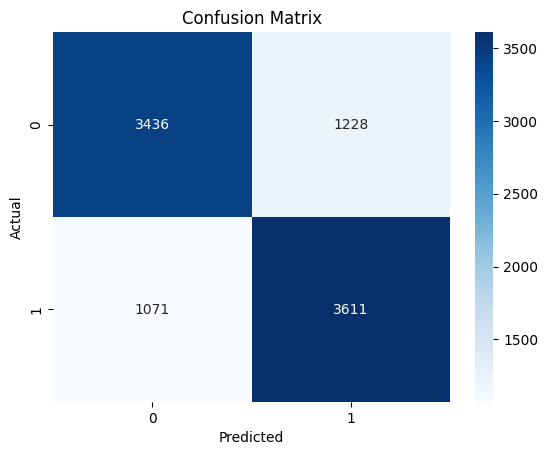

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4664
           1       0.75      0.77      0.76      4682

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



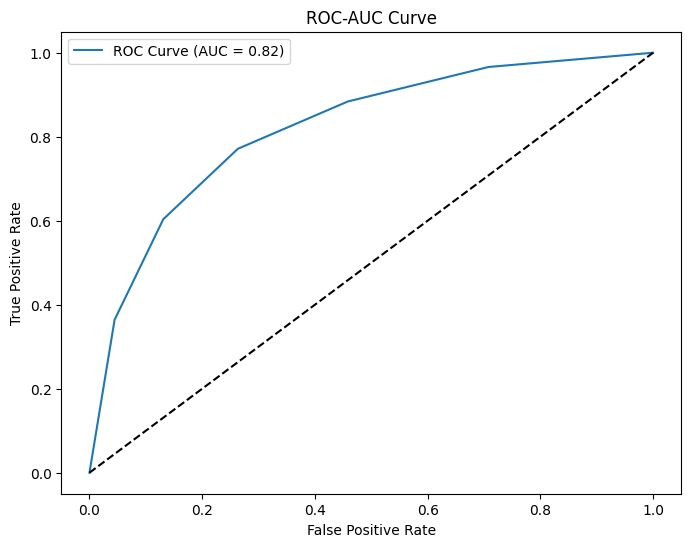

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

y_probs = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

y_probs = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()